In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_columns = 200

In [3]:
df = pd.read_csv('data/GoT/battles.csv')
df.head(2)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1: Самые агрессивные и самые забитые</h3> 
    </div>
</div>

Постройте <b>bar chart</b>, отражающий количества битв каждой из семей, сначала нарисуйте всех аттакующих, а на другой график поместите защищающихся. Столбцы должны быть отсортированы.
<br><br>
Выясните, кто нападал чаще всех и кому приходилось отбиваться чаще всех.

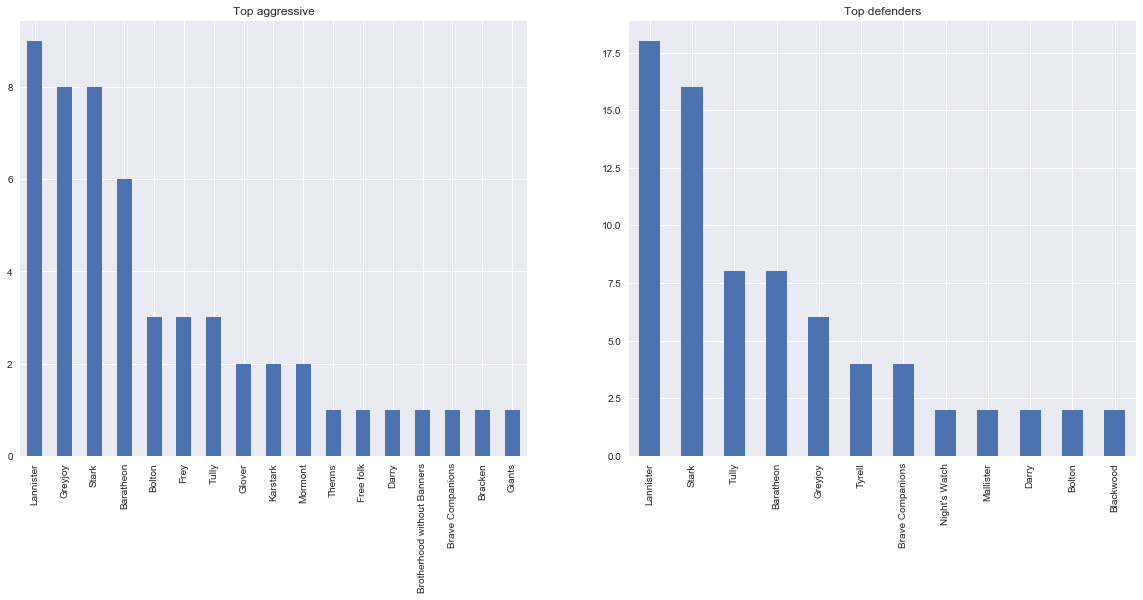

In [5]:
from toolz.dicttoolz import merge_with

attakers = ['attacker_1','attacker_2','attacker_3','attacker_4']
defenders = ['defender_1','defender_1','defender_3','defender_4']

f,axs = plt.subplots(1,2, figsize=(20, 8))

pd.Series(merge_with(sum, [df[c].value_counts().to_dict() for c in attakers]))\
    .sort_values(ascending=False)\
    .plot(kind='bar', ax=axs[0]);
axs[0].set_title('Top aggressive');
    
pd.Series(merge_with(sum, [df[c].value_counts().to_dict() for c in defenders]))\
    .sort_values(ascending=False)\
    .plot(kind='bar', ax=axs[1]);
axs[1].set_title('Top defenders');

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2: Кто дерется лучше всех?</h3> 
    </div>
</div>

Правильно сосчитайте количество побед и поражений у каждого из королей (__attacker_king__, __defender_king__).

Покажите их статистику как stacked bar plot, отсортировав столбцы по общему количество сражений.

In [7]:
df['defender_outcome'] = df['attacker_outcome']
df.defender_outcome = df.defender_outcome.map({'win': 'loss', 'loss': 'win'})

In [8]:
merged = merge_with(sum, 
           df.groupby('attacker_king')['attacker_outcome'].value_counts().to_dict(),
           df.groupby('defender_king')['defender_outcome'].value_counts().to_dict())

results = pd.DataFrame(data = merged, index=[0]).stack().fillna(0).transpose()
results.columns = pd.Index(['loss', 'win'])
results['total'] = results.loss + results.win
results.sort_values(by='total', ascending=False, inplace=True)

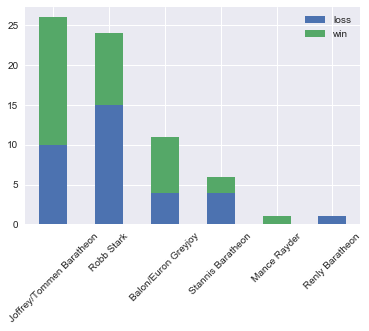

In [9]:
results[['loss', 'win']].plot(kind='bar', stacked=True, rot=45);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3: Земля, залитая кровью</h3> 
    </div>
</div>

Представим, что в битве столкнулись отряды в 5000 и 15000 человек. Будем считать потери равными <i>2*min(5000, 15000) = 10000</i>. То есть, грубо говоря, всегда побеждает большинство, но из меньшей армии солдат с собой унесет еще хотя бы одного.

Теперь, зная, как высчитывать потери после боя, выясните, в каком конкретно регионе (__region__) и на какой местности (__location__) полегло больше людишек. Два графика: один - по регионам, второй - по месностям.

Проиллюстрируйте результаты с помощью __pie chart__.

In [10]:
cleaned = df[df.attacker_size.notnull() & df.defender_size.notnull()].copy()

In [11]:
cleaned['losses'] = 2*np.min(np.array([cleaned.attacker_size, cleaned.defender_size]), axis=0)

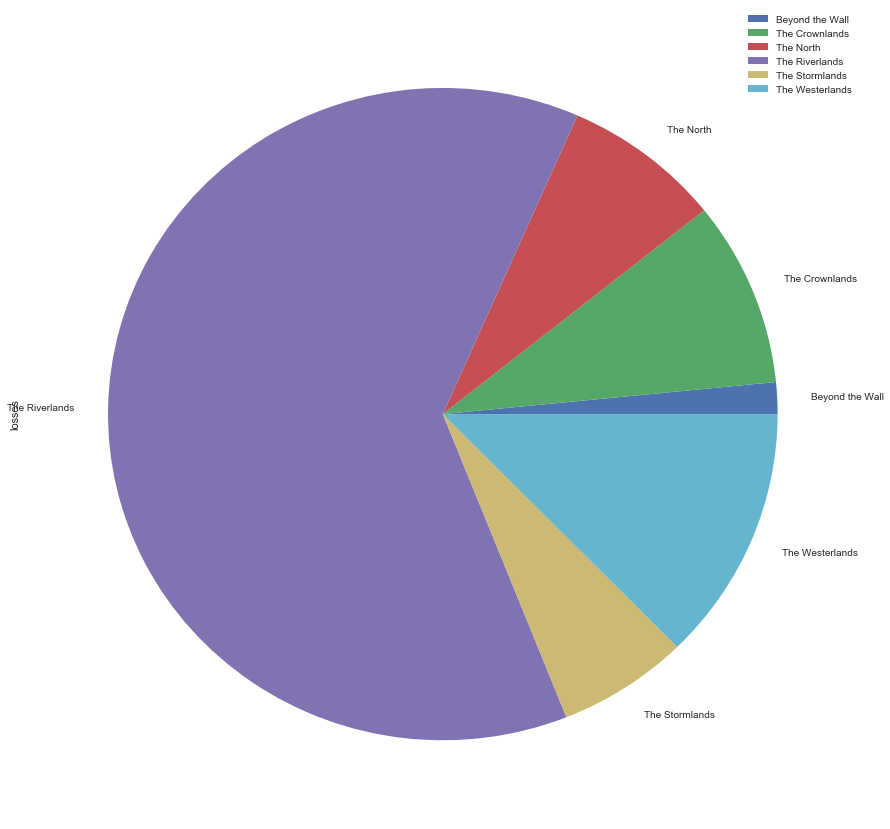

In [12]:
f,ax = plt.subplots(1,1, figsize=(15, 15));
cleaned.groupby(['region']).agg(sum).plot.pie(y='losses', ax=ax);

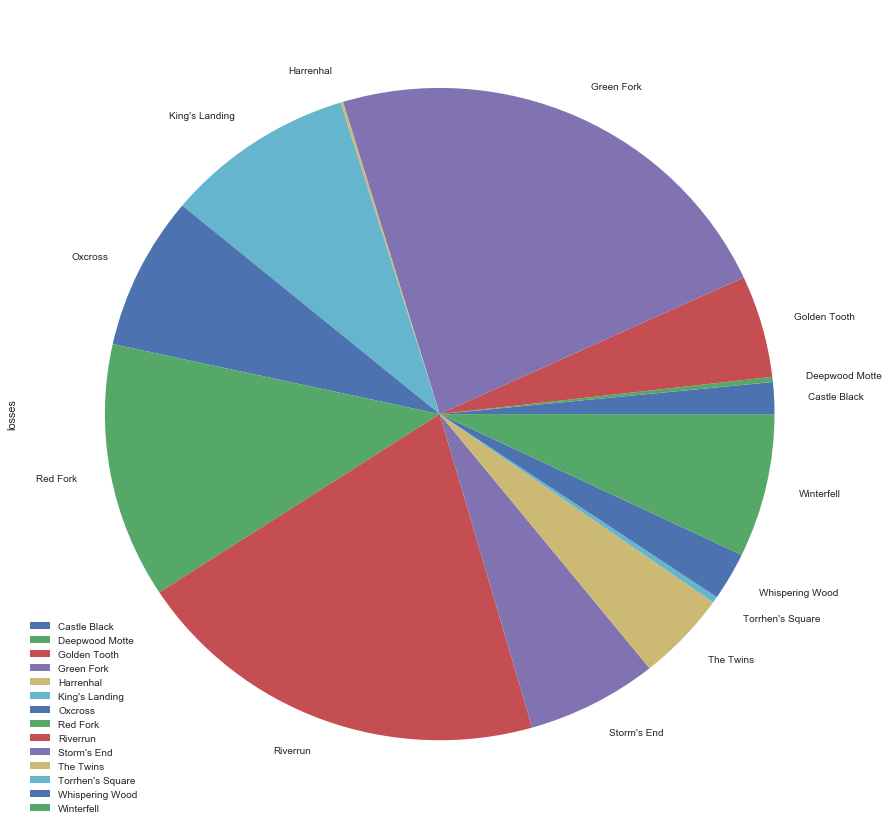

In [13]:
f,ax = plt.subplots(1,1, figsize=(15, 15));
cleaned.groupby(['location']).agg(sum).plot.pie(y='losses', ax=ax);